# Representing Images as Vectors and Computing Angles and Distances

## 📚 Learning Objectives

By completing this notebook, you will:
- Represent images as vectors
- Compute angles and distances between image vectors
- Understand inner product and distance measures
- Apply similarity measures to compare images

## 🔗 Prerequisites

- ✅ Understanding of vectors and linear algebra
- ✅ Understanding of inner product and norms
- ✅ Python, NumPy knowledge

---

## Official Structure Reference

This notebook covers practical activities from **Course 03, Unit 3**:
- Representing images as vectors and computing angles and distances between them
- **Source:** `DETAILED_UNIT_DESCRIPTIONS.md` - Unit 3 Practical Content

---

## Introduction

**Images can be represented as high-dimensional vectors** by flattening pixel values. We can then compute angles, distances, and similarity measures between images using linear algebra concepts.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from scipy.spatial.distance import cosine, euclidean

print("✅ Libraries imported!")
print("\nRepresenting Images as Vectors and Computing Angles and Distances")
print("=" * 60)

✅ Libraries imported!

Representing Images as Vectors and Computing Angles and Distances


## Part 1: Representing Images as Vectors


Part 1: Representing Images as Vectors

Loaded 1797 images
Image shape: (8, 8)
Image dimension (flattened): (64,)

Vector representation shape: (1797, 64)
Each image is now a 64-dimensional vector


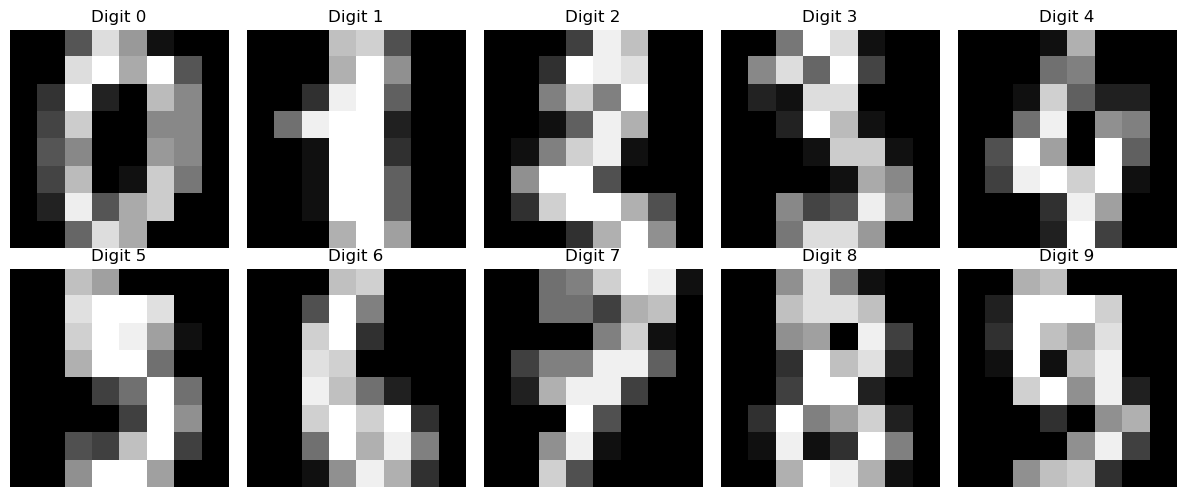


✅ Images represented as vectors!


In [2]:
print("=" * 60)
print("Part 1: Representing Images as Vectors")
print("=" * 60)

# Load digit images (8x8 pixels each)
digits = load_digits()
images = digits.images
labels = digits.target

print(f"\nLoaded {len(images)} images")
print(f"Image shape: {images[0].shape}")
print(f"Image dimension (flattened): {images[0].flatten().shape}")

# Flatten images to vectors
image_vectors = images.reshape(len(images), -1)
print(f"\nVector representation shape: {image_vectors.shape}")
print(f"Each image is now a {image_vectors.shape[1]}-dimensional vector")

# Visualize some images
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i in range(10):
    ax = axes[i // 5, i % 5]
    ax.imshow(images[i], cmap='gray')
    ax.set_title(f'Digit {labels[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

print("\n✅ Images represented as vectors!")

## Part 2: Computing Angles and Distances Between Images



Part 2: Computing Angles and Distances Between Images

Comparing images:
  Image 1: Digit 0
  Image 2: Digit 1
  Image 3: Digit 4

Comparison Results:

Image 1 vs Image 2 (Digits 0 vs 1):
  Euclidean distance: 59.5567
  Cosine similarity: 0.5191
  Angle: 58.73° (1.0250 radians)

Image 1 vs Image 3 (Digits 0 vs 4):
  Euclidean distance: 50.4282
  Cosine similarity: 0.6047
  Angle: 52.80° (0.9214 radians)


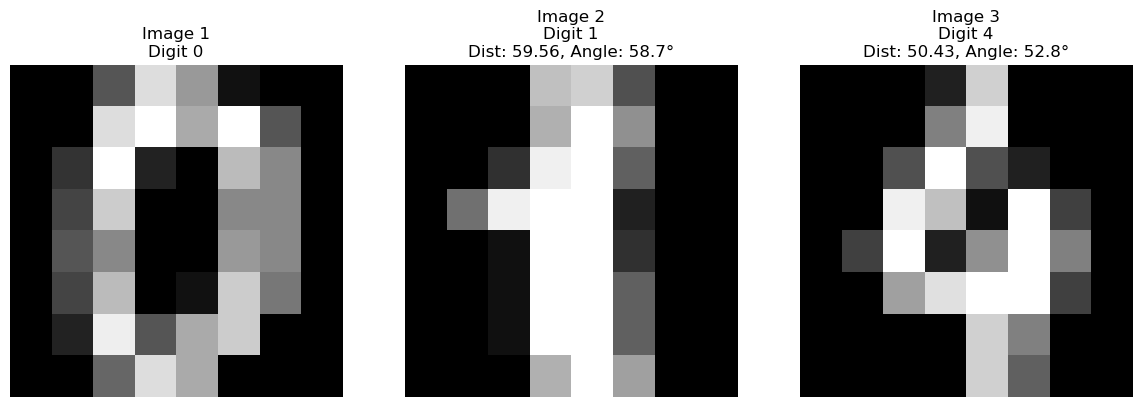


✅ Angles and distances computed!


In [3]:
print("\n" + "=" * 60)
print("Part 2: Computing Angles and Distances Between Images")
print("=" * 60)

# Select a few images for comparison
img1_idx = 0
img2_idx = 1
img3_idx = 100

img1_vec = image_vectors[img1_idx]
img2_vec = image_vectors[img2_idx]
img3_vec = image_vectors[img3_idx]

print(f"\nComparing images:")
print(f"  Image 1: Digit {labels[img1_idx]}")
print(f"  Image 2: Digit {labels[img2_idx]}")
print(f"  Image 3: Digit {labels[img3_idx]}")

# Euclidean distance (L2 norm)
def euclidean_distance(v1, v2):
    """Compute Euclidean distance between two vectors"""
    return np.linalg.norm(v1 - v2)

# Cosine similarity (inner product of normalized vectors)
def cosine_similarity(v1, v2):
    """Compute cosine similarity between two vectors"""
    dot_product = np.dot(v1, v2)
    norm1 = np.linalg.norm(v1)
    norm2 = np.linalg.norm(v2)
    if norm1 == 0 or norm2 == 0:
        return 0
    return dot_product / (norm1 * norm2)

# Angle between vectors (in radians and degrees)
def angle_between_vectors(v1, v2):
    """Compute angle between two vectors"""
    cos_sim = cosine_similarity(v1, v2)
    # Clamp to avoid numerical errors
    cos_sim = np.clip(cos_sim, -1.0, 1.0)
    angle_rad = np.arccos(cos_sim)
    angle_deg = np.degrees(angle_rad)
    return angle_rad, angle_deg

# Compute distances and angles
dist_12 = euclidean_distance(img1_vec, img2_vec)
dist_13 = euclidean_distance(img1_vec, img3_vec)
sim_12 = cosine_similarity(img1_vec, img2_vec)
sim_13 = cosine_similarity(img1_vec, img3_vec)
angle_12_rad, angle_12_deg = angle_between_vectors(img1_vec, img2_vec)
angle_13_rad, angle_13_deg = angle_between_vectors(img1_vec, img3_vec)

print("\n" + "=" * 60)
print("Comparison Results:")
print("=" * 60)
print(f"\nImage 1 vs Image 2 (Digits {labels[img1_idx]} vs {labels[img2_idx]}):")
print(f"  Euclidean distance: {dist_12:.4f}")
print(f"  Cosine similarity: {sim_12:.4f}")
print(f"  Angle: {angle_12_deg:.2f}° ({angle_12_rad:.4f} radians)")

print(f"\nImage 1 vs Image 3 (Digits {labels[img1_idx]} vs {labels[img3_idx]}):")
print(f"  Euclidean distance: {dist_13:.4f}")
print(f"  Cosine similarity: {sim_13:.4f}")
print(f"  Angle: {angle_13_deg:.2f}° ({angle_13_rad:.4f} radians)")

# Visualize comparisons
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(images[img1_idx], cmap='gray')
axes[0].set_title(f'Image 1\nDigit {labels[img1_idx]}')
axes[0].axis('off')
axes[1].imshow(images[img2_idx], cmap='gray')
axes[1].set_title(f'Image 2\nDigit {labels[img2_idx]}\nDist: {dist_12:.2f}, Angle: {angle_12_deg:.1f}°')
axes[1].axis('off')
axes[2].imshow(images[img3_idx], cmap='gray')
axes[2].set_title(f'Image 3\nDigit {labels[img3_idx]}\nDist: {dist_13:.2f}, Angle: {angle_13_deg:.1f}°')
axes[2].axis('off')
plt.tight_layout()
plt.show()

print("\n✅ Angles and distances computed!")


Part 3: Finding Similar Images

Query image: Digit 0

Top 5 most similar images (by Euclidean distance):
  1. Image 0 (Digit 0) - Distance: 0.0000 [QUERY]
  2. Image 877 (Digit 0) - Distance: 10.9545
  3. Image 1365 (Digit 0) - Distance: 12.8062
  4. Image 1541 (Digit 0) - Distance: 13.1149
  5. Image 1167 (Digit 0) - Distance: 13.2665
  6. Image 1029 (Digit 0) - Distance: 13.3417

Top 5 most similar images (by cosine similarity):
  1. Image 0 (Digit 0) - Similarity: 1.0000 [QUERY]
  2. Image 877 (Digit 0) - Similarity: 0.9807
  3. Image 464 (Digit 0) - Similarity: 0.9745
  4. Image 1365 (Digit 0) - Similarity: 0.9742
  5. Image 1541 (Digit 0) - Similarity: 0.9718
  6. Image 1167 (Digit 0) - Similarity: 0.9711


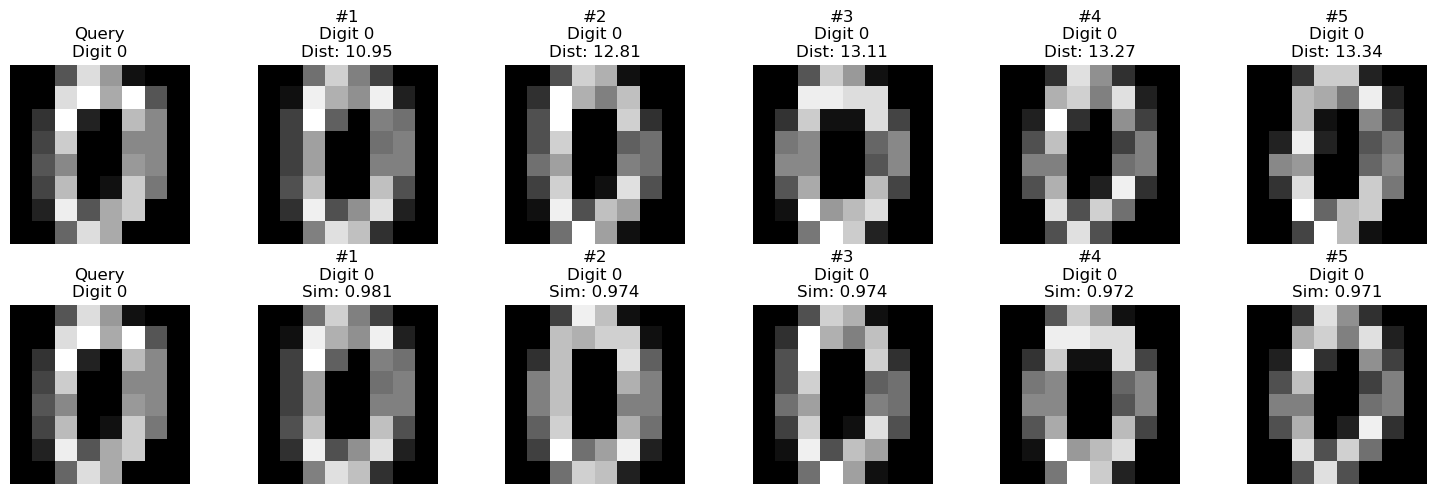


✅ Similar images found!


In [4]:
print("\n" + "=" * 60)
print("Part 3: Finding Similar Images")
print("=" * 60)

# Find most similar images to a query image
query_idx = 0
query_vec = image_vectors[query_idx]
query_label = labels[query_idx]

print(f"\nQuery image: Digit {query_label}")

# Compute distances to all images
distances = []
similarities = []
for i in range(len(image_vectors)):
    dist = euclidean_distance(query_vec, image_vectors[i])
    sim = cosine_similarity(query_vec, image_vectors[i])
    distances.append((i, dist, labels[i]))
    similarities.append((i, sim, labels[i]))

# Sort by distance (ascending) and similarity (descending)
distances_sorted = sorted(distances, key=lambda x: x[1])
similarities_sorted = sorted(similarities, key=lambda x: x[1], reverse=True)

# Get top 5 most similar
print("\nTop 5 most similar images (by Euclidean distance):")
for i, (idx, dist, label) in enumerate(distances_sorted[:6]):  # Skip first (itself)
    if i == 0:
        print(f"  {i+1}. Image {idx} (Digit {label}) - Distance: {dist:.4f} [QUERY]")
    else:
        print(f"  {i+1}. Image {idx} (Digit {label}) - Distance: {dist:.4f}")

print("\nTop 5 most similar images (by cosine similarity):")
for i, (idx, sim, label) in enumerate(similarities_sorted[:6]):  # Skip first (itself)
    if i == 0:
        print(f"  {i+1}. Image {idx} (Digit {label}) - Similarity: {sim:.4f} [QUERY]")
    else:
        print(f"  {i+1}. Image {idx} (Digit {label}) - Similarity: {sim:.4f}")

# Visualize query and similar images
fig, axes = plt.subplots(2, 6, figsize=(15, 5))
for i in range(6):
    if i == 0:
        idx = query_idx
        title = f'Query\nDigit {labels[idx]}'
    else:
        idx = distances_sorted[i][0]
        dist = distances_sorted[i][1]
        title = f'#{i}\nDigit {labels[idx]}\nDist: {dist:.2f}'
    
    axes[0, i].imshow(images[idx], cmap='gray')
    axes[0, i].set_title(title)
    axes[0, i].axis('off')

for i in range(6):
    if i == 0:
        idx = query_idx
        title = f'Query\nDigit {labels[idx]}'
    else:
        idx = similarities_sorted[i][0]
        sim = similarities_sorted[i][1]
        title = f'#{i}\nDigit {labels[idx]}\nSim: {sim:.3f}'
    
    axes[1, i].imshow(images[idx], cmap='gray')
    axes[1, i].set_title(title)
    axes[1, i].axis('off')

axes[0, 0].set_ylabel('Euclidean Distance', fontsize=12)
axes[1, 0].set_ylabel('Cosine Similarity', fontsize=12)
plt.tight_layout()
plt.show()

print("\n✅ Similar images found!")

## Summary

### Key Concepts:
1. **Image Representation**: Images can be flattened into vectors
2. **Euclidean Distance**: L2 norm, measures absolute difference
3. **Cosine Similarity**: Normalized dot product, measures angle
4. **Angle Between Vectors**: Computed from cosine similarity
5. **Similarity Search**: Find similar images using distance/similarity measures

### Best Practices:
- Normalize vectors for cosine similarity
- Use Euclidean distance for magnitude differences
- Use cosine similarity for direction/orientation differences
- Consider dimensionality when computing distances

### Applications:
- Image retrieval
- Face recognition
- Content-based image search
- Clustering similar images

**Reference:** Course 03, Unit 3: "Optimization and Statistical Foundations" - Image similarity measures practical content